### Poner a punto el entorno

#### Crear entorno virtual para usar las librerias necesarias
Abri en una terminal el directorio del proyecto y pone:
1. python -m venv venv
2. source venv/bin/activate
3. pip install -r requirements.txt

Si estas en MacOS es lo mismo solo cambia el primer paso:
1. python3 -m venv venv

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Leer dataset
df = pd.read_csv('housing.csv')

# Mostrar resumen general
print("Primeras filas:")
print(df.head())

print("\nValores faltantes:")
print(df.isnull().sum())

# Imputar la columna 'total_bedrooms' con la media
imputer = SimpleImputer(strategy='mean')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

# Confirmar que no haya valores nulos
print("\nDespués de la imputación:")
print(df.isnull().sum())

Primeras filas:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Valores faltantes:
longitude               0
latitude     

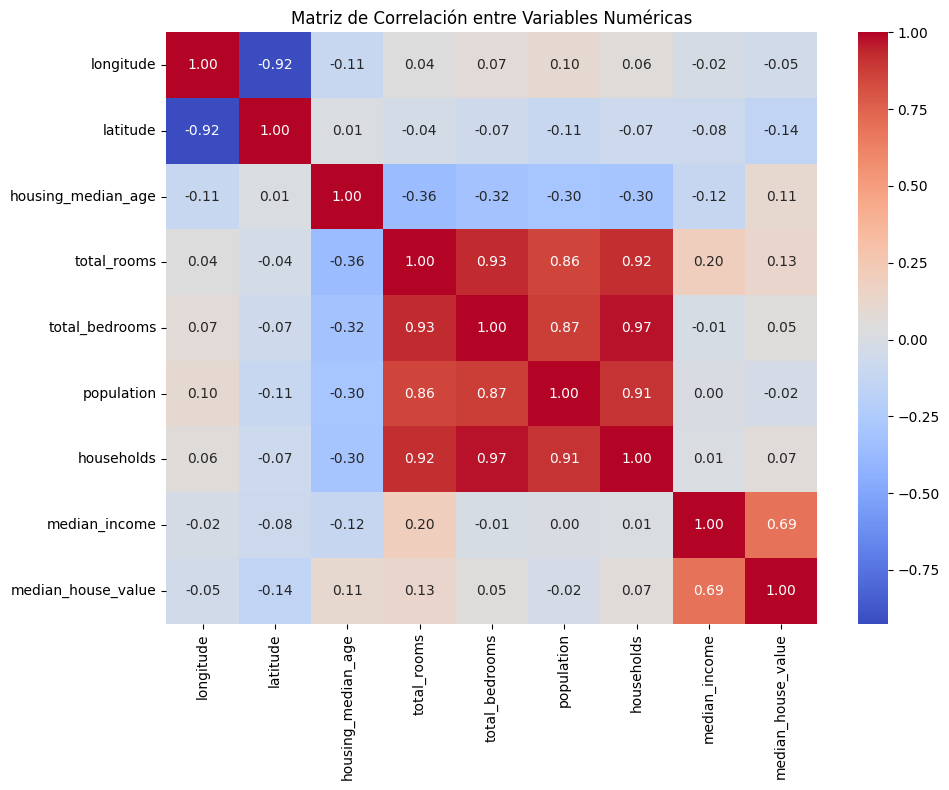

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación solo para variables numéricas
correlation_matrix = df.corr(numeric_only=True)

# Visualizarla con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

In [3]:
print(df.columns.tolist())

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

selected_features = [
    'median_income',
    'housing_median_age',
    'total_rooms',
    'latitude',
    'longitude'
]

# 1. Separar X e y
X = df[selected_features]
y = df['median_house_value']

# 2. Dividir en entrenamiento y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crear pipeline con escalado
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# 4. Aplicar transformación solo a X
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Confirmar dimensiones
print("X_train scaled shape:", X_train_scaled.shape)
print("X_test scaled shape:", X_test_scaled.shape)

X_train scaled shape: (16512, 5)
X_test scaled shape: (4128, 5)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Modelo 1: Regresión Lineal ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluación
print("----- Linear Regression -----")
print("R2:", round(r2_score(y_test, y_pred_lr), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred_lr), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 2))

# --- Modelo 2: Random Forest ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluación
print("\n----- Random Forest Regressor -----")
print("R2:", round(r2_score(y_test, y_pred_rf), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred_rf), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 2))

----- Linear Regression -----
R2: 0.584
MAE: 54230.74
RMSE: 73793.1

----- Random Forest Regressor -----
R2: 0.811
MAE: 32010.49
RMSE: 49721.47


# Conclusiones del Proceso KDD – Regresión Grupal

## Resumen de pasos realizados

### 1. **Objetivo**
Se buscó predecir el valor medio de viviendas en California utilizando atributos socioeconómicos y geográficos provistos por un dataset público (`housing.csv`).

### 2. **Carga y limpieza de datos**
- Se cargó el dataset con `pandas`.
- Se identificaron y trataron valores nulos en la columna `total_bedrooms`, los cuales fueron imputados utilizando la media de la columna.
- Se verificó que no quedaran valores faltantes antes de continuar.

### 3. **Selección de atributos**
- Se generó una matriz de correlación para analizar la relación entre las variables predictoras y la variable objetivo (`median_house_value`).
- Se seleccionaron las siguientes variables por su relevancia directa o espacial:
  - `median_income`
  - `housing_median_age`
  - `total_rooms`
  - `latitude`
  - `longitude`

### 4. **Transformación**
- Se dividió el dataset en conjunto de entrenamiento (80%) y de prueba (20%) usando `train_test_split`.
- Se aplicó escalado normalizado a los atributos con `StandardScaler` a través de un pipeline de `scikit-learn` para preparar los datos para los modelos.

### 5. **Minería de datos**
Se entrenaron dos modelos:

- **Regresión Lineal** (`LinearRegression`):
  - Modelo base.
  - Métricas obtenidas:
    - R²: 0.584 (58.4%)
    - MAE: \$54.230
    - RMSE: \$73.793

- **Random Forest Regressor** (`RandomForestRegressor`):
  - Modelo más robusto, capaz de capturar relaciones no lineales.
  - Métricas obtenidas:
    - R²: 0.811 (81.1%)
    - MAE: \$32.010
    - RMSE: \$49.721

### 6. **Evaluación y comparación**
- La regresión lineal funcionó como baseline, pero sus resultados fueron limitados.
- El modelo de Random Forest mostró un rendimiento significativamente superior, capturando mejor las relaciones complejas entre variables (por ejemplo, el ingreso medio y la localización geográfica).
- La diferencia en los errores (MAE y RMSE) resalta la capacidad del Random Forest para hacer predicciones más precisas y confiables.

---

## Nota final: interpretación de métricas

En este trabajo, las métricas **MAE** y **RMSE** se utilizaron para cuantificar el error de los modelos de regresión.

- **MAE (Mean Absolute Error)** indica el error promedio por predicción, sin importar si el modelo sobreestima o subestima.  
  → En este caso, un MAE ≈ \$32.000 significa que el modelo predice con una desviación promedio de \$32.000 respecto al valor real de la vivienda.

- **RMSE (Root Mean Squared Error)** también mide el error, pero penaliza más fuerte aquellos casos donde el modelo comete errores grandes.  
  → Aquí, un RMSE ≈ \$49.700 indica que existen algunos valores en los que la diferencia entre lo predicho y lo real fue alta.

Ambas métricas están expresadas en dólares, igual que la variable objetivo (`median_house_value`), por lo que su interpretación es directa y cuantificable.

Estas métricas, junto con el **R² = 0.811**, validan que el modelo de Random Forest es efectivo y puede ser útil como herramienta predictiva en escenarios similares.

---

## Conclusión Final

El proceso permitió aplicar de manera integral todas las fases del KDD: desde la exploración y limpieza del dataset, pasando por una selección de atributos guiada por correlaciones, hasta el entrenamiento y evaluación de modelos supervisados.

El modelo de Random Forest Regressor fue el que mejores resultados obtuvo, con un coeficiente de determinación R² = 0.811, lo que indica que el modelo logra explicar el 81.1% de la variabilidad del valor de las viviendas en función de las variables seleccionadas. Esto representa un nivel de precisión muy bueno para un problema real de predicción.

Además, presentó errores considerablemente más bajos que la regresión lineal tanto en MAE como en RMSE, lo que evidencia que el modelo no solo explica mejor la tendencia general, sino que también predice con menor desviación para cada observación.

Este resultado demuestra que en fenómenos reales como la valuación de propiedades, donde intervienen múltiples factores interrelacionados y relaciones no lineales, los modelos basados en árboles como Random Forest son mucho más eficaces que los modelos lineales tradicionales.